I decided that I will use total profit for analyze becouse Percentage profit do not take into action fact that some of bikes gives small percentage profit, but by multiplying them by quantity of orders finally it cuold bring relative icome to the company 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [23]:
sns.set(rc={'figure.figsize':(12,6)})

In [24]:
df = pd.read_csv('BikesTotalProfitPerSale.csv', sep=";")

In [25]:
df['StandardCost'] = df[['StandardCost']].applymap(lambda x: str(x.replace(',','.'))).astype('float64')
df['TotalProfit'] = df[['TotalProfit']].applymap(lambda x: str(x.replace(',','.'))).astype('float64')

In [26]:
np.min(df['TotalProfit'])

-15099.7455

In [27]:
np.max(df['TotalProfit'])

1487.8356

<AxesSubplot:xlabel='StandardCost', ylabel='TotalProfit'>

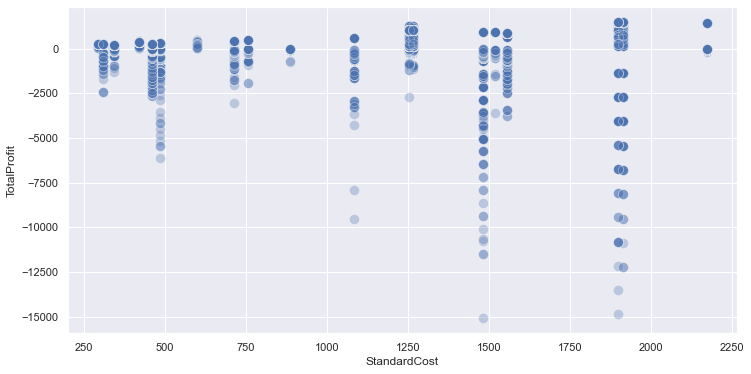

In [28]:
sns.scatterplot(x='StandardCost', y='TotalProfit',alpha=0.3, data=df, s=100)

<AxesSubplot:xlabel='Size', ylabel='TotalProfit'>

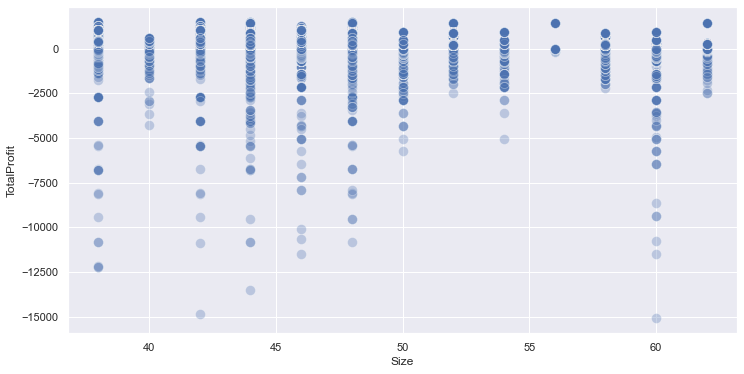

In [29]:
sns.scatterplot(x='Size', y='TotalProfit',alpha=0.3, data=df, s=100)

<AxesSubplot:xlabel='Weight', ylabel='TotalProfit'>

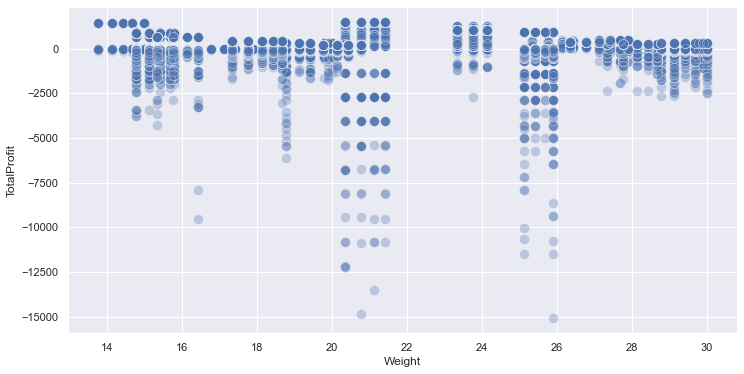

In [30]:
sns.scatterplot(x='Weight', y='TotalProfit',alpha=0.3, data=df, s=100)

#### NOTE

As we can see, we have a lot of big negative total profit in our data. We need to deal with them, by dropping the data

In [36]:
df[df['TotalProfit'] < -2500].head()

Name  Size   Color Class  Weight  OrderQty  StandardCost  \
6669  Mountain Bikes    42   Black    H    20.77         2     1898.0944   
6670  Mountain Bikes    48  Silver    H    21.42         3     1912.1544   
6671  Mountain Bikes    48   Black    H    21.42         2     1898.0944   
6672  Mountain Bikes    38   Black    H    20.35         5     1898.0944   
6673  Mountain Bikes    38  Silver    H    20.35         2     1912.1544   

      isDiscounted  OrderYear  AveliablePeriod  TotalProfit  
6669             1       2012                1   -2699.3170  
6670             1       2012                1   -4078.9680  
6671             1       2012                1   -2699.3170  
6672             1       2012                1   -6748.2925  
6673             1       2012                1   -2719.3120

In [21]:
(len(df[df['TotalProfit'] < -2500]) / len(df))*100

0.5678833212418383

We have 227 sales that bring icome lower than -2500, which is 0.5% of the data. The most of this oreders are probably from another companies, becouse the quantity of this oredrs reach up to 30 units. 

In [48]:
df[df['OrderQty'] <= 3]

Name  Size   Color Class  Weight  OrderQty  StandardCost  \
0      Mountain Bikes    42   Black    H    20.77         1     1898.0944   
1      Mountain Bikes    44   Black    H    21.13         3     1898.0944   
2      Mountain Bikes    48   Black    H    21.42         1     1898.0944   
3      Mountain Bikes    38  Silver    H    20.35         1     1912.1544   
4      Mountain Bikes    42  Silver    H    20.77         1     1912.1544   
...               ...   ...     ...   ...     ...       ...           ...   
39968      Road Bikes    58   Black    L    20.79         1      343.6496   
39969   Touring Bikes    54    Blue    H    25.68         1     1481.9379   
39970   Touring Bikes    58    Blue    L    29.90         1      461.4448   
39971      Road Bikes    52   Black    L    20.42         1      343.6496   
39972   Touring Bikes    50    Blue    M    27.42         1      755.1508   

       isDiscounted  OrderYear  AveliablePeriod  TotalProfit  
0                 0       2011                0     126.8996  
1                 0       2011                0     380.6988  
2                 0       2011                0     126.8996  
3                 0       2011                0     127.8396  
4                 0       2011                0     127.8396  
...             ...        ...              ...          ...  
39968             0       2014                1     196.3404  
39969             0       2014                1     902.1321  
39970             0       2014                1     280.9052  
39971             0       2014                1     196.3404  
39972             0       2014                1     459.6992  

[32604 rows x 11 columns]

In [49]:
np.min(df[df['OrderQty'] <= 3])

Name               Mountain Bikes
Size                           38
Color                       Black
Class                          H 
Weight                      13.77
OrderQty                        1
StandardCost             294.5797
isDiscounted                    0
OrderYear                    2011
AveliablePeriod                 0
TotalProfit             -4078.968
dtype: object

Unfortunetly, there is no sign for individual versus business clients in databse, so We must get some intuition for that and be awere of them. We can drop the orders where order quantity is lower than 2, but it still can be same adventage, becouse some compay could order 10 bicykles in each group, so together is 10 bikes but quantity will be one for each. 

-----------------------------------------------
Second idea is to cut the big orders. There is a column called toatlSale, which is income for each order. The adventage is some people could buy 2, 3 or even 4 bikes in one order. In that case total sale will contain all of the orders for each bike we analyze

###### Summary
1. Remove total profit lover than -2500
2. Remove orders with quantity higher than 4
3. Remove big orders, for eg. higher than 10.000 USD
4. Remove all products that has been sold under the StandardCosts (We can guess that company sold bikes under the price becouse they get profit from cross-selling or they just want to sold out product that has been not profitable enought to keep them in storage. Selling above the standard cost is evidence of unusuall sales.)

In [53]:
positive_profits = df[df['TotalProfit']>=0]

<AxesSubplot:xlabel='Weight', ylabel='TotalProfit'>

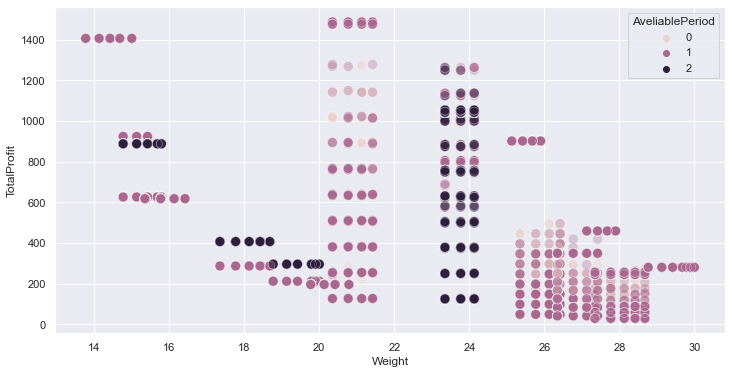

In [57]:
sns.scatterplot(x='Weight', y='TotalProfit',hue = 'AveliablePeriod',alpha=0.3, data=positive_profits, s=100)

<AxesSubplot:xlabel='Weight', ylabel='TotalProfit'>

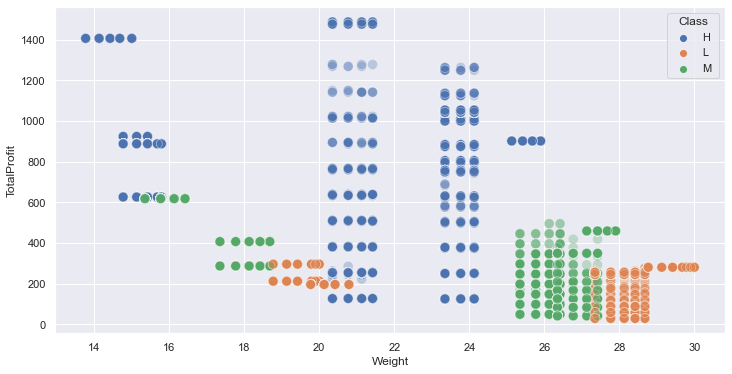

In [63]:
sns.scatterplot(x='Weight', y='TotalProfit',hue = 'Class',alpha=0.3, data=positive_profits, s=100)

<AxesSubplot:xlabel='StandardCost', ylabel='TotalProfit'>

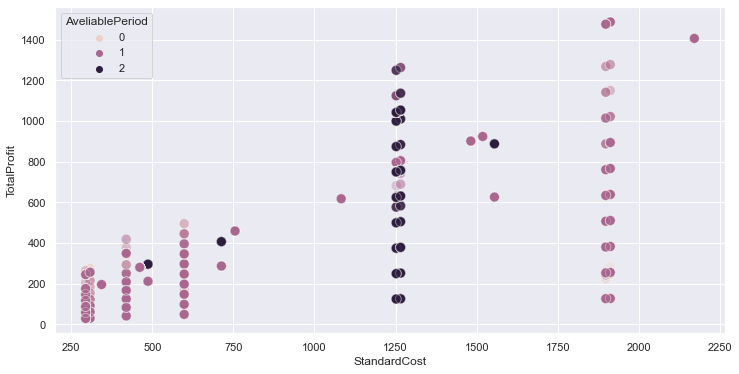

In [64]:
sns.scatterplot(x='StandardCost', y='TotalProfit',hue = 'AveliablePeriod',alpha=0.3, data=positive_profits, s=100)

<AxesSubplot:xlabel='StandardCost', ylabel='Size'>

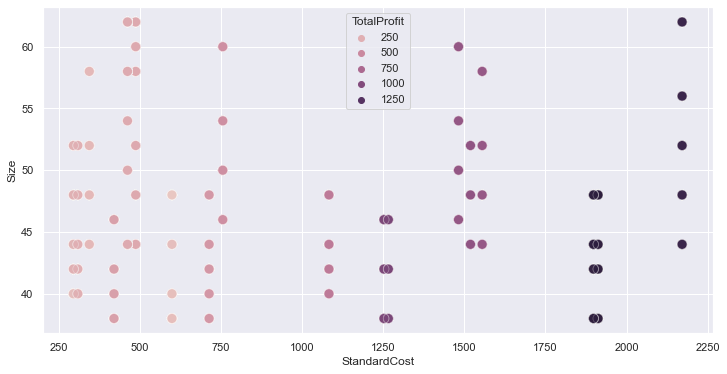

In [66]:
sns.scatterplot(x='StandardCost', y='Size',hue = 'TotalProfit',alpha=0.3, data=positive_profits, s=100)

<AxesSubplot:xlabel='StandardCost', ylabel='Weight'>

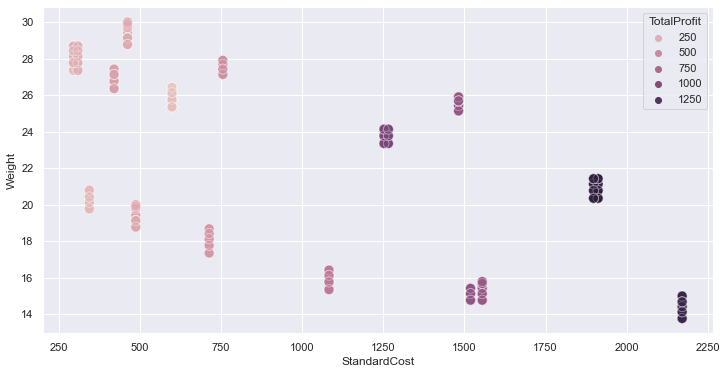

In [67]:
sns.scatterplot(x='StandardCost', y='Weight',hue = 'TotalProfit',alpha=0.3, data=positive_profits, s=100)

<AxesSubplot:xlabel='StandardCost', ylabel='OrderQty'>

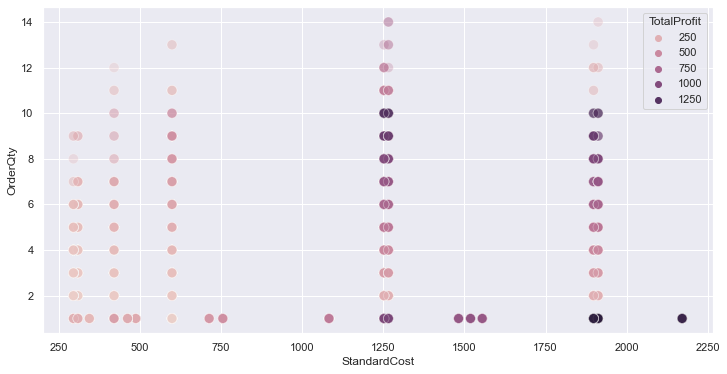

In [71]:
sns.scatterplot(x='StandardCost', y='OrderQty',hue = 'TotalProfit',alpha=0.3, data=positive_profits, s=100)

<AxesSubplot:xlabel='Size', ylabel='Weight'>

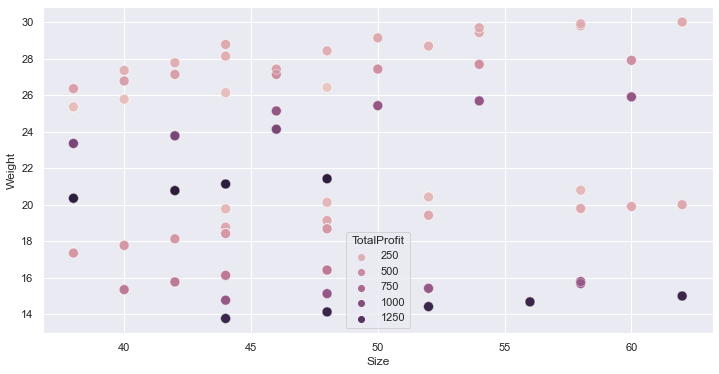

In [72]:
sns.scatterplot(x='Size', y='Weight',hue = 'TotalProfit',alpha=0.3, data=positive_profits, s=100)

In [74]:
positive_profits['TotalProfit'].unique()

array([ 126.8996,  380.6988,  127.8396,  255.6792,  253.7992,  507.5984,
        383.5188,  761.3976,  634.498 , 1406.9758, 1487.8356,  212.3916,
       1476.8956,  511.3584,  639.198 ,  894.8772,  767.0376,  244.7988,
        263.2487, 1015.1968, 1268.996 , 1022.7168,  285.5986,  888.2972,
        222.7489, 1150.5564,  242.9988, 1278.396 , 1142.0964,  148.6758,
        346.9102,   99.1172,  247.793 ,  297.3516,   49.5586,  446.0274,
        198.2344,  169.7399,  396.4688,  287.3577,  626.6146,  296.2834,
        797.1169,  805.8001,  924.5636,  495.586 ,  200.6017,   29.4143,
         88.2429,   30.7761,   61.5522,  167.6624,  750.0762,  379.1235,
        631.8725,   41.9156,   83.8312,  125.0127,   92.3283,  252.749 ,
        625.0635,   58.8286,  153.8805,  209.578 ,  884.6215,  758.247 ,
        875.0889,  147.0715,  125.7468,  117.6572,  375.0381,  123.1044,
        215.4327,  184.6566, 1125.1143,  250.0254,  500.0508,  126.3745,
       1000.1016,  505.498 ,  176.4858,  742.8792, 